In [2]:
import altair as alt
import pandas as pd

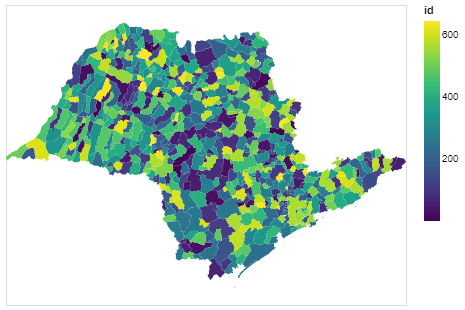

In [30]:
sp = alt.topo_feature('https://raw.githubusercontent.com/GiovaniValdrighi/DataScience_IC/master/topojson-sp2.json', 'geojs-35-mun')
alt.Chart(sp).mark_geoshape().encode(
    color = 'id:Q',
)

In [36]:
data = pd.read_csv('dadosSP1.csv', sep = ',')

In [38]:
data.drop('Unnamed: 0', axis =1, inplace = True)

In [47]:
data[data.NO_MUNICIPIO_RESIDENCIA == 'Embu das Artes'].NO_MUNICIPIO_RESIDENCIA = 'Embu'

C:\Users\giova\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
data[data.NO_MUNICIPIO_RESIDENCIA == 'Embu das Artes']

,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q027
508,Embu das Artes,37.0,F,1,1,11,1,0,NaN,387.6,591.6,533.7,467.1,480.0,C,C
650,Embu das Artes,20.0,F,1,1,3,1,0,NaN,536.7,609.3,595.1,644.3,720.0,H,C
738,Embu das Artes,20.0,F,3,1,2,1,0,NaN,390.5,528.1,457.4,489.8,520.0,E,A
1006,Embu das Artes,19.0,F,2,1,1,1,0,NaN,490.5,495.9,563.7,463.5,520.0,B,A
1007,Embu das Artes,17.0,F,3,3,0,1,1,NaN,459.2,479.2,480.1,422.9,520.0,G,A
1140,Embu das Artes,19.0,F,1,1,2,1,0,NaN,465.8,498.3,544.7,407.8,640.0,D,A
1306,Embu das Artes,18.0,M,1,1,1,1,0,NaN,496.7,399.4,427.1,448.5,520.0,B,A
1379,Embu das Artes,22.0,F,1,1,4,1,0,NaN,614.6,647.9,683.2,693.2,620.0,G,A
1518,Embu das Artes,18.0,F,3,2,0,2,0,2.0,531.0,570.6,538.3,673.2,680.0,C,A
1568,Embu das Artes,18.0,F,1,2,0,2,0,2.0,511.5,407.3,344.9,506.7,520.0,C,A
